In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

* 299 Т1к после ТО
* 315 Т1к перед ТО

* 317 Т2к перед ТО
* 319 Т2к после ТО

* 325 Т2к выхТО1
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5

* 480 Q1контура
* 481 Q2контура

* 307 P1контура
* 309 Р2контура

* 327 Твозвуха
* 313 Рградирни

* 381 Iвг1
* 395 Iвг2
* 396 Iвг3


In [2]:
# df_init = pd.read_csv(os.path.join(os.path.dirname(os.path.abspath("")),
#                                    "4october_8december_2022.csv"), on_bad_lines='skip')
df_init = pd.read_csv(os.path.join(os.path.dirname(os.path.abspath("")),
                                   "041022_to_231222.csv"), on_bad_lines='skip')

In [3]:
df_init.head(10)

,ID,Timestamp,Value,Quality
0,299,2022-10-04 09:07:23.313,0.0,2
1,299,2022-10-04 09:07:23.328,0.0,0
2,299,2022-10-04 09:07:29.825,23.0,1
3,299,2022-10-04 09:07:58.075,23.0,1
4,299,2022-10-04 09:08:00.092,23.0,1
5,299,2022-10-04 09:08:02.092,23.0,1
6,299,2022-10-04 09:08:59.126,23.0,1
7,299,2022-10-04 09:09:01.126,23.0,1
8,299,2022-10-04 09:09:03.126,23.0,1
9,299,2022-10-04 09:09:59.644,23.0,1


In [4]:
df_init.tail()

,ID,Timestamp,Value,Quality
2314333,481,2022-12-23 18:33:32.611,0.0,0
2314334,481,2022-12-23 19:32:32.611,0.0,0
2314335,481,2022-12-23 20:31:32.611,0.0,0
2314336,481,2022-12-23 21:30:32.611,0.0,0
2314337,481,2022-12-23 22:29:32.611,0.0,0


In [5]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314338 entries, 0 to 2314337
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   Timestamp  object 
 2   Value      float64
 3   Quality    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 70.6+ MB


In [7]:
df_init["ID"].unique()

array([299, 307, 309, 313, 315, 317, 319, 325, 327, 381, 395, 396, 460,
       461, 462, 463, 480, 481])

In [53]:
# change datetime format to "%m/%d/%Y, %H:%M"
df_init["Timestamp"] = pd.to_datetime(df_init["Timestamp"], format="%Y-%m-%dT%H:%M")

In [54]:
df_init.head(10)

,ID,Timestamp,Value,Quality
0,299,2022-10-04 09:07:23.313,0.0,2
1,299,2022-10-04 09:07:23.328,0.0,0
2,299,2022-10-04 09:07:29.825,23.0,1
3,299,2022-10-04 09:07:58.075,23.0,1
4,299,2022-10-04 09:08:00.092,23.0,1
5,299,2022-10-04 09:08:02.092,23.0,1
6,299,2022-10-04 09:08:59.126,23.0,1
7,299,2022-10-04 09:09:01.126,23.0,1
8,299,2022-10-04 09:09:03.126,23.0,1
9,299,2022-10-04 09:09:59.644,23.0,1


In [55]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314338 entries, 0 to 2314337
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ID         int64         
 1   Timestamp  datetime64[ns]
 2   Value      float64       
 3   Quality    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 70.6 MB


In [56]:
df_init["Quality"].value_counts()

1    2307699
0       5026
2       1109
3        504
Name: Quality, dtype: int64

In [57]:
# drop all rows where Quality value is not 1 or 0
df_init = df_init[(df_init["Quality"] == 1) | (df_init["Quality"] == 0)]
df_init["Quality"].value_counts()

1    2307699
0       5026
Name: Quality, dtype: int64

In [58]:
#create few df_ids
df_299 = df_init[df_init["ID"] == 299]
df_315 = df_init[df_init["ID"] == 315]
df_481 = df_init[df_init["ID"] == 481]
len(df_299), len(df_315), len(df_481)

(159833, 160477, 194528)

In [59]:
df_299.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159833 entries, 1 to 159922
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ID         159833 non-null  int64         
 1   Timestamp  159833 non-null  datetime64[ns]
 2   Value      159833 non-null  float64       
 3   Quality    159833 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.1 MB


In [60]:
df_299 = df_299.set_index("Timestamp")

In [61]:
df_315 = df_315.set_index("Timestamp")

In [62]:
df_481 = df_481.set_index("Timestamp")

## Before use groupby  on dfs better to drop unused columns (ids, quality)

In [63]:
# to visualize how temperature difference changes over a time need to remove rows with quality=0
df_299_operated = df_299[df_299["Quality"] == 1]
df_315_operated = df_315[df_315["Quality"] == 1]
df_481_operated = df_481[df_481["Quality"] == 1]

In [64]:
df_299_operated_mean = df_299_operated.groupby(pd.Grouper(freq="5min")).mean()
df_315_operated_mean = df_315_operated.groupby(pd.Grouper(freq="5min")).mean()
df_481_operated_mean = df_481_operated.groupby(pd.Grouper(freq="5min")).mean()
len(df_299_operated_mean), len(df_315_operated_mean), len(df_481_operated_mean)

(23119, 23119, 23119)

In [65]:
df_315_299_diff_mean = df_315_operated_mean - df_299_operated_mean
df_315_299_diff_mean = df_315_299_diff_mean.drop(["ID", "Quality"], axis=1)
# df_315_299_diff_mean = df_315_299_diff_mean[df_315_299_diff_mean["Value"] > 0]
df_315_299_diff_mean.loc[:, "Value"]

Timestamp
2022-10-04 09:05:00    0.299999
2022-10-04 09:10:00    0.299999
2022-10-04 09:15:00    0.306249
2022-10-04 09:20:00    0.373684
2022-10-04 09:25:00    0.400000
                         ...   
2022-12-23 15:15:00    3.175000
2022-12-23 15:20:00    2.540000
2022-12-23 15:25:00    2.025000
2022-12-23 15:30:00    1.775000
2022-12-23 15:35:00    1.985714
Freq: 5T, Name: Value, Length: 23119, dtype: float64

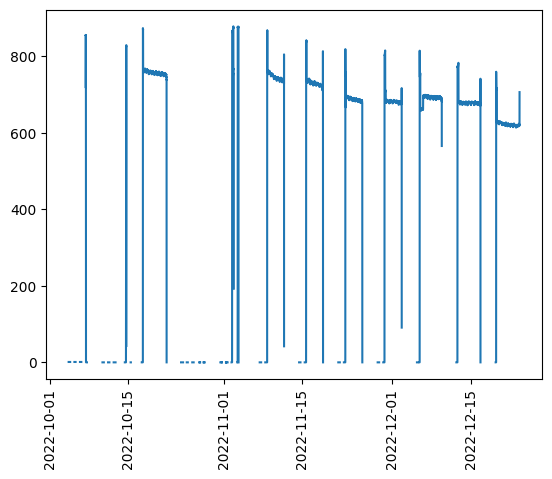

In [71]:
plt.plot(df_481_operated_mean.index, df_481_operated_mean["Value"])
plt.xticks(rotation=90)
plt.show()

In [192]:
# split on periods when on power
df_481_1017_1021 = df_481_operated_mean.loc["2022-10-17":"2022-10-21"]
df_481_1115_1118 = df_481_operated_mean.loc["2022-11-15":"2022-11-18"]
df_481_1129_1202 = df_481_operated_mean.loc["2022-11-29":"2022-12-02"]
df_481_1219_1223 = df_481_operated_mean.loc["2022-12-19":"2022-12-23"]

In [193]:
df_481_1017_1021 = df_481_1017_1021[df_481_1017_1021["Value"] > 0]
df_481_1115_1118 = df_481_1115_1118[df_481_1115_1118["Value"] > 0]
df_481_1129_1202 = df_481_1129_1202[df_481_1129_1202["Value"] > 0]
df_481_1219_1223 = df_481_1219_1223[df_481_1219_1223["Value"] > 0]

In [194]:
df_481_1017_1021 = df_481_1017_1021.dropna()
df_481_1115_1118 = df_481_1115_1118.dropna()
df_481_1129_1202 = df_481_1129_1202.dropna()
df_481_1219_1223 = df_481_1219_1223.dropna()

In [195]:
df_481_1017_1021_mean = df_481_1017_1021["Value"].mean()
df_481_1115_1118_mean = df_481_1115_1118["Value"].mean()
df_481_1129_1202_mean = df_481_1129_1202["Value"].mean()
df_481_1219_1223_mean = df_481_1219_1223["Value"].mean()
df_481_1017_1021_mean, df_481_1115_1118_mean, df_481_1129_1202_mean, df_481_1219_1223_mean

(758.109248166607, 730.2654752286231, 686.0955373812602, 624.010558183592)

In [161]:
# drop all rows where value more than mean +- 50
df_481_1017_1021_filtered = df_481_1017_1021[(df_481_1017_1021["Value"] < df_481_1017_1021_mean+50) & (df_481_1017_1021["Value"] > df_481_1017_1021_mean-50)]
df_481_1017_1021_filtered

,ID,Value,Quality
Timestamp,,,
2022-10-17 15:10:00,481.0,757.15,1.0
2022-10-17 15:15:00,481.0,756.95,1.0
2022-10-17 15:20:00,481.0,757.30,1.0
2022-10-17 15:25:00,481.0,756.90,1.0
2022-10-17 15:30:00,481.0,758.70,1.0
...,...,...,...
2022-10-21 19:10:00,481.0,741.35,1.0
2022-10-21 19:15:00,481.0,741.35,1.0
2022-10-21 19:20:00,481.0,739.75,1.0


(array([19282.5, 19283. , 19283.5, 19284. , 19284.5, 19285. , 19285.5,
        19286. , 19286.5, 19287. ]),
 [Text(19282.5, 0, '10-17 12'),
  Text(19283.0, 0, '10-18 00'),
  Text(19283.5, 0, '10-18 12'),
  Text(19284.0, 0, '10-19 00'),
  Text(19284.5, 0, '10-19 12'),
  Text(19285.0, 0, '10-20 00'),
  Text(19285.5, 0, '10-20 12'),
  Text(19286.0, 0, '10-21 00'),
  Text(19286.5, 0, '10-21 12'),
  Text(19287.0, 0, '10-22 00')])

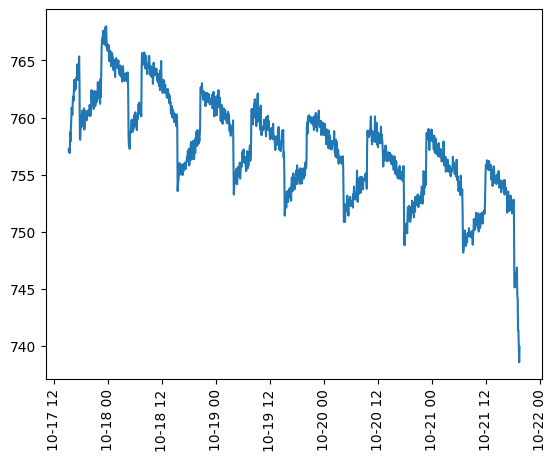

In [162]:
plt.plot(df_481_1017_1021_filtered.index, df_481_1017_1021_filtered["Value"])
plt.xticks(rotation=90)

In [196]:
df_481_1115_1118_filtered = df_481_1115_1118[(df_481_1115_1118["Value"] < df_481_1115_1118_mean+50) & (df_481_1115_1118["Value"] > df_481_1115_1118_mean-50)]
df_481_1115_1118_filtered

,ID,Value,Quality
Timestamp,,,
2022-11-15 17:20:00,481.0,734.55,1.0
2022-11-15 17:25:00,481.0,734.80,1.0
2022-11-15 17:30:00,481.0,735.95,1.0
2022-11-15 17:35:00,481.0,735.45,1.0
2022-11-15 17:40:00,481.0,736.75,1.0
...,...,...,...
2022-11-18 15:10:00,481.0,711.30,1.0
2022-11-18 15:15:00,481.0,710.00,1.0
2022-11-18 15:20:00,481.0,710.65,1.0


(array([19312. , 19312.5, 19313. , 19313.5, 19314. , 19314.5]),
 [Text(19312.0, 0, '11-16 00'),
  Text(19312.5, 0, '11-16 12'),
  Text(19313.0, 0, '11-17 00'),
  Text(19313.5, 0, '11-17 12'),
  Text(19314.0, 0, '11-18 00'),
  Text(19314.5, 0, '11-18 12')])

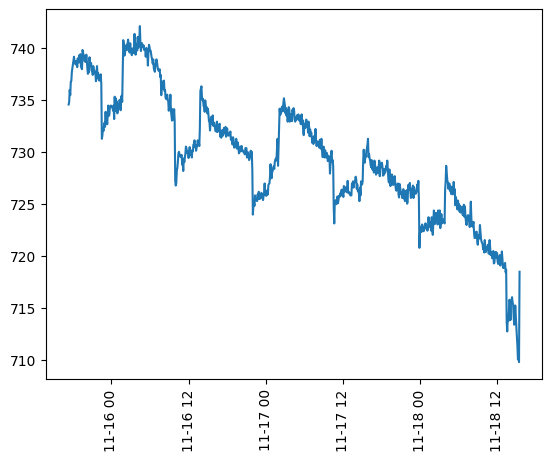

In [197]:
plt.plot(df_481_1115_1118_filtered.index, df_481_1115_1118_filtered["Value"])
plt.xticks(rotation=90)

In [182]:
df_481_1129_1202_filtered = df_481_1129_1202[(df_481_1129_1202["Value"] < df_481_1129_1202_mean+20) & (df_481_1129_1202["Value"] > df_481_1129_1202_mean-20)]
df_481_1129_1202_filtered

,ID,Value,Quality
Timestamp,,,
2022-11-29 20:00:00,481.0,698.90,1.0
2022-11-29 20:05:00,481.0,679.70,1.0
2022-11-29 20:10:00,481.0,684.35,1.0
2022-11-29 20:15:00,481.0,683.70,1.0
2022-11-29 20:20:00,481.0,683.05,1.0
...,...,...,...
2022-12-02 15:35:00,481.0,677.30,1.0
2022-12-02 15:40:00,481.0,677.20,1.0
2022-12-02 15:45:00,481.0,676.75,1.0


(array([19326. , 19326.5, 19327. , 19327.5, 19328. , 19328.5]),
 [Text(19326.0, 0, '11-30 00'),
  Text(19326.5, 0, '11-30 12'),
  Text(19327.0, 0, '12-01 00'),
  Text(19327.5, 0, '12-01 12'),
  Text(19328.0, 0, '12-02 00'),
  Text(19328.5, 0, '12-02 12')])

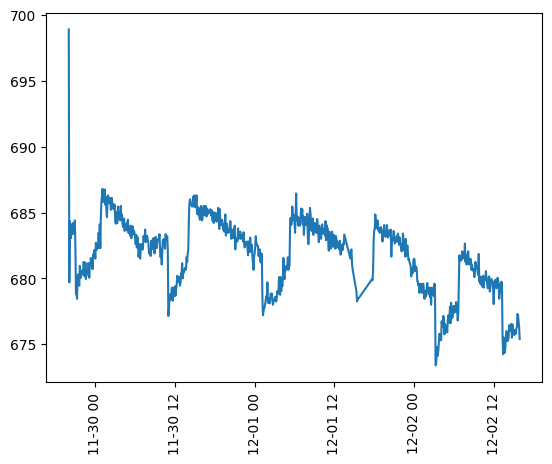

In [183]:
plt.plot(df_481_1129_1202_filtered.index, df_481_1129_1202_filtered["Value"])
plt.xticks(rotation=90)

In [201]:
df_481_1219_1223_filtered = df_481_1219_1223[(df_481_1219_1223["Value"] < df_481_1219_1223_mean+20) & (df_481_1219_1223["Value"] > df_481_1219_1223_mean-20)]

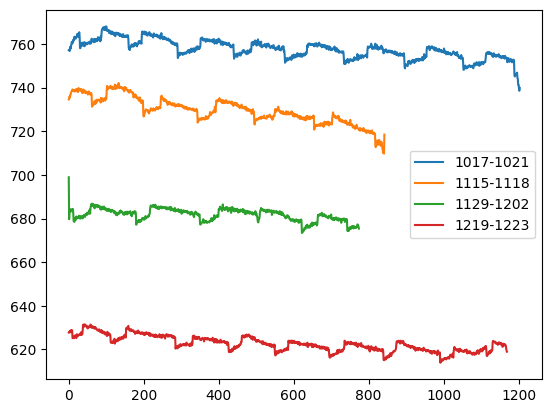

In [202]:
plt.plot(np.arange(0, len(df_481_1017_1021_filtered),1), df_481_1017_1021_filtered["Value"], label="1017-1021")
plt.plot(np.arange(0, len(df_481_1115_1118_filtered),1), df_481_1115_1118_filtered["Value"], label="1115-1118")
plt.plot(np.arange(0, len(df_481_1129_1202_filtered),1), df_481_1129_1202_filtered["Value"], label="1129-1202")
plt.plot(np.arange(0, len(df_481_1219_1223_filtered),1), df_481_1219_1223_filtered["Value"], label="1219-1223")
plt.legend()

In [168]:
# lets 